# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Load the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [77]:
import pandas as pd
import numpy as np
import json

In [85]:
#Importing twitter archive dataset
import pandas as pd
archive = pd.read_csv("twitter-archive-enhanced.csv")
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [ ]:
import requests
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open(url.split('/')[-1], mode = "wb") as file:
    file.write(response.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Import necessary libraries
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = arch_twt.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [ ]:
import requests
url = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
response = requests.get(url)

with open(url.split('/')[-1], mode = "wb") as file:
    file.write(response.content)

In [ ]:
with open("tweet-json.txt", encoding = "utf-8") as file:
    print(len(file.readlines()))

### NB: Start Loading the Notebook here(If necessary) to avoid errors
- Load the data in the notebook sequentially, reason is some columns were dropped

In [79]:
#Programmatically opening the tweet-json.txt file
df_list = []
with open("tweet-json.txt", "r", encoding = 'utf-8') as file:
    for i in file:
        data = json.loads(i)
        df_list.append(data)

In [5]:
df_list[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

In [80]:
df = pd.DataFrame(df_list, columns = df_list[0].keys())
df = df[["id", "favorite_count"]]
df.head(6)

,id,favorite_count
0,892420643555336193,39467
1,892177421306343426,33819
2,891815181378084864,25461
3,891689557279858688,42908
4,891327558926688256,41048
5,891087950875897856,20562


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [7]:
#Investigating the archive dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2)
memory usage: 36.9 KB


In [8]:
#Checking for the datatypes of the archive dataset
df.dtypes

id                int64
favorite_count    int64
dtype: object

In [13]:
#More investigation on the archive dataset
df.describe()

,id,favorite_count
count,2.354000e+03,2354.000000
mean,7.426978e+17,8080.968564
std,6.852812e+16,11814.771334
min,6.660209e+17,0.000000
25%,6.783975e+17,1415.000000
50%,7.194596e+17,3603.500000
75%,7.993058e+17,10122.250000
max,8.924206e+17,132810.000000


In [15]:
#loading the tweet-json.txt file as df
df.head(6)

,id,favorite_count
0,892420643555336193,39467
1,892177421306343426,33819
2,891815181378084864,25461
3,891689557279858688,42908
4,891327558926688256,41048
5,891087950875897856,20562


In [86]:
#Removing the retweeted_status_id & retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_user_id, in_reply_to_status_id
archive = archive.drop(["retweeted_status_timestamp", "retweeted_status_id", "retweeted_status_user_id", "in_reply_to_user_id", "in_reply_to_status_id"], axis = 1)

In [87]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [88]:
#Loading the image predictions dataset as predictions
predictions = pd.read_csv("image_predictions.tsv", sep = '\t')
predictions.head(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True


In [16]:
#Investigating the predictions dataset
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
#Checking the datatypes of the predictions dataset
predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [89]:
#Checking for null values in the expanded column
archive[archive.expanded_urls.isnull() == True]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10,None,None,None,None,None
55,881633300179243008,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,None,None,None,None,None
64,879674319642796034,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14,10,None,None,None,None,None
113,870726314365509632,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,10,None,None,None,None,None
148,863427515083354112,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12,10,None,None,None,None,None
179,857214891891077121,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,12,10,None,None,None,None,None
185,856330835276025856,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,NaN,14,10,None,None,None,None,None
186,856288084350160898,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14,10,None,None,None,None,None
188,855862651834028034,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,None,None,None,None,None
189,855860136149123072,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,666,10,None,None,None,None,None


In [90]:
#checking for the datatypes of the archive dataset
archive.dtypes

tweet_id               int64
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

In [91]:
#Checking the rating_numerator column for the maximum value
archive[archive.rating_numerator == archive.rating_numerator.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [92]:
#checking the rating denominator for the maximum value
archive[archive.rating_denominator == archive.rating_denominator.max()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [93]:
#checking the rating numerator whose value is greater than 20
archive[archive.rating_numerator > 20]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,None,None,None,None,None
189,855860136149123072,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,666,10,None,None,None,None,None
290,838150277551247360,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,182,10,None,None,None,None,None
313,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,None,None,None,None,None
340,832215909146226688,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [94]:
#using regular expressions to check the numerator values where they have been incorrectly entered
import re
archive[archive.text.str.contains("r(\d+\.\d*\/\d+)")][["text", "rating_numerator"]]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,text,rating_numerator


In [95]:
#Check for duplicate values in the dataset
archive[archive.tweet_id.duplicated()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [96]:
archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [97]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [98]:
predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [99]:
#value count of the ima_num column
predictions.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [100]:
#checking for duplicated tweet id
predictions[predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [101]:
#checking for duplicated jpg_url
predictions[predictions.jpg_url.duplicated()].jpg_url.values

array([ 'https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg',
       'https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg',
       'https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg',
       'https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg',
       'https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg',
       'https://pbs.twimg.com/tweet_video_thumb/CeBym7oXEAEWbEg.jpg',
       'https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg',
       'https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg',
       'https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg',
       'https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg',
       'https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg',
       'https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg',
       'https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg',
       'https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg',
       'https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg',
       'https://pbs.twimg.com/media/Ck2d7tJWUAEPTL3.jpg',
       'https://pbs

In [102]:
#filtering duplicated jpg_url in the dataset
predictions[predictions.jpg_url.apply(lambda x: x in predictions[predictions.jpg_url.duplicated()].jpg_url.values)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 2 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2)
memory usage: 36.9 KB


In [104]:
df.describe()

,id,favorite_count
count,2.354000e+03,2354.000000
mean,7.426978e+17,8080.968564
std,6.852812e+16,11814.771334
min,6.660209e+17,0.000000
25%,6.783975e+17,1415.000000
50%,7.194596e+17,3603.500000
75%,7.993058e+17,10122.250000
max,8.924206e+17,132810.000000


In [105]:
#checking for duplicated  values in the twitter json converted dataset
df[df.duplicated() == True]

,id,favorite_count


In [106]:
#checking for duplicated id's
df[df.id.duplicated()]

,id,favorite_count


In [107]:
#checking for duplicated retweet count & favourite count
df.favorite_count.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2324    False
2325    False
2326    False
2327    False
2328     True
2329    False
2330    False
2331    False
2332     True
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340     True
2341    False
2342    False
2343     True
2344     True
2345    False
2346    False
2347     True
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
Name: favorite_count, Length: 2354, dtype: bool

### Quality issues
#### `archive table`, `predictions table`, `df table` :
1.There are columns with missing values namely - expanded_urls

2.Name, doggo, floofer, pupper and puppo columns have value with the name `None`

3.Values in `source` column are not human readable

4.Use of `_ `instead of `space` in p1, p2 and p3 column values. Also, values upper case sometimes lowercase other times in p1, p2 and p3 columns

5.column names are not clearly descriptive

6.There are image duplicate predictions present for duplicate `jpg_url` with different tweet ids and rest all the data same.

7.tweet id title is different, `id` here `tweet_id` in others.

8.There are `image duplicate predictions` present for duplicate `jpg_url` with different `tweet ids` and rest all the data same


### Tidiness issues
1.One variable in 4 columns - dog_stage(doggo, floofer, pupper, puppo)

2.Merge the tables - `archive_tweet` and `df`

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [108]:
# Make copies of original pieces of data
predictions_clean = predictions.copy()
archive_clean = archive.copy()
df_clean = df.copy()

### Issue #1:
- There are columns with missing values namely - expanded_urls

#### Define:
-  Fill the missing values of expanded_urls column in tweet_data_clean table using tweet_id as tweet id is the last part of the tweet URL after "status/"

#### Code

In [112]:
#Fill missing values
archive_clean.expanded_urls = 'https://twitter.com/dog_rates/status/' + archive.tweet_id.astype(str) 

#### Test

In [113]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [114]:
#checking for null values in the expanded url's column
archive_clean[archive_clean.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2:
- .Name, doggo, floofer, pupper and puppo columns have value with the name None

#### Define
-  Check for the correct words in the text column to correctly interpret the dog_stage and then reform the dog_stage using these words

#### Code

In [115]:
# Collect the correct words for dog_stage interpretation in 4 variables for seperating 4 different dog_stages 
dog_pupper = ['Pup', 'pup', 'pups', 'puppers', 'pupper', 'Pupper', 'puppeters', 'puppy', 'Puppy', 'Pup.', 'pup.', 'pups.', 'puppers.', 'pupper.', 'Pupper.', 'puppeters.', 'puppy.', 'Puppy.', 'pupper,', 'pupper?', '(pupper)', 'PUPPER', '(pupper).']
dog_doggo = ['Doggo', 'doggo', 'dogg', 'Doggo.', 'doggo.', 'dogg.', 'doggo?', '(doggo)', 'DOGGO', '(doggo),']
dog_puppo = ['puppo', 'Puppo', 'puppo.', 'Puppo.', 'puppo?']
dog_floofer = ['Floofer', 'floofs', 'floofer', 'floofers', 'floof', 'Floofy', 'floofy', 'floofs.', 'floofer.', 'floofers.', 'floof.', 'Floofy.', 'floofy.', 'Floofer.']

In [116]:
# Form a new column to test
archive_clean['dog_stage_2'] = ''

In [117]:
# Use the above 4 variables to correctly interpret dog stage in the new column
for item in archive_clean.text:
    y = archive_clean[archive_clean.text == item].index.values
    x = str(item).strip(".,").split(' ')
    for word in x:
        if (word in dog_pupper) and (word in dog_doggo):
            archive_clean.loc[y, 'dog_stage_2'] = 'pupper & doggo'
        elif (word in dog_puppo) and (word in dog_doggo):
            archive_clean.loc[y, 'dog_stage_2'] = 'puppo & doggo'
        elif (word in dog_floofer) and (word in dog_doggo):
            archive_clean.loc[y, 'dog_stage_2'] = 'floofer & doggo'
        elif word in dog_pupper:
            archive_clean.loc[y, 'dog_stage_2'] = 'pupper'
        elif word in dog_doggo:
            archive_clean.loc[y, 'dog_stage_2'] = 'doggo'
        elif word in dog_puppo:
            archive_clean.loc[y, 'dog_stage_2'] = 'puppo'
        elif word in dog_floofer:
            archive_clean.loc[y, 'dog_stage_2'] = 'floofer'

In [118]:
# Replace the dog_stage column with the new column values
archive_clean.dog_stage = archive_clean.dog_stage_2

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [119]:
# Drop the new column and replace instances of empty string with NaN
archive_clean.dog_stage = archive_clean.dog_stage.replace('', np.nan)
archive_clean.drop('dog_stage_2', axis=1, inplace=True)

#### Test

In [120]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


In [121]:
#Filtering dog stage column and counting the values within
archive_clean.dog_stage.value_counts()

pupper     435
doggo       83
puppo       28
floofer     21
Name: dog_stage_2, dtype: int64

### Issue #3
- .Values in source column are not human readable

#### Define
- Replace the values in source column with human readable text


#### Code

In [122]:
# Check the distribution of source values 
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [123]:
# Replace the values in the source column with human readable text
archive_clean.source = archive_clean.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
archive_clean.source = archive_clean.source.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
archive_clean.source = archive_clean.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
archive_clean.source = archive_clean.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [124]:
archive_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #4
- Use of _instead of space in p1, p2 and p3 column values. Also, values upper case sometimes lowercase other times in p1, p2 and p3 columns

#### Define
- Replace the instance of _ with ` and change the values to upper case inp1, p2 and p3`

#### Code

In [125]:
predictions_clean.p1 = predictions_clean.p1.str.replace('_', ' ').str.capitalize()
predictions_clean.p2 = predictions_clean.p2.str.replace('_', ' ').str.capitalize()
predictions_clean.p3 = predictions_clean.p3.str.replace('_', ' ').str.capitalize()

#### Test

In [126]:
predictions_clean[['p1', 'p2', 'p3']].sample(6)

,p1,p2,p3
650,Labrador retriever,Golden retriever,Beagle
1175,Samoyed,Pomeranian,Maltese dog
1729,Golden retriever,Pekinese,Labrador retriever
1975,Comic book,Envelope,Book jacket
143,Crash helmet,Toaster,Mouse
182,Cuirass,Breastplate,Bulletproof vest


### Issue #5
- Column names are not clearly descriptive

#### Define
- Rename the columns with descriptive names

#### Code

In [127]:
predictions_clean = predictions_clean.rename(columns = {'jpg_url':'image_url', 'img_num':'image_number', 'p1':'first_prediction', 'p2':'second_prediction', 'p3':'third_prediction', 'p1_conf':'first_prediction_confidence', 'p2_conf':'second_prediction_confidence', 'p3_conf':'third_prediction_confidence', 'p1_dog':'first_prediction_dog', 'p2_dog':'second_prediction_dog', 'p3_dog':'third_prediction_dog'})

#### Test

In [128]:
list(predictions_clean)

['tweet_id',
 'image_url',
 'image_number',
 'first_prediction',
 'first_prediction_confidence',
 'first_prediction_dog',
 'second_prediction',
 'second_prediction_confidence',
 'second_prediction_dog',
 'third_prediction',
 'third_prediction_confidence',
 'third_prediction_dog']

### Issue #6
- There are image duplicate predictions present for duplicate jpg_url with different tweet ids and rest all the data same.

#### Define
- Drop the observations where image_url is duplicated

#### Code

In [129]:
predictions_clean = predictions_clean.drop_duplicates(['image_url'])

#### Test

In [130]:
predictions_clean[predictions_clean.image_url.duplicated()]

,tweet_id,image_url,image_number,first_prediction,first_prediction_confidence,first_prediction_dog,second_prediction,second_prediction_confidence,second_prediction_dog,third_prediction,third_prediction_confidence,third_prediction_dog


In [131]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue #7
- Tweet id title is different, id here tweet_id in others.

#### Define
- Rename the id column in tweet_count_clean to tweet_id

#### Code

In [132]:
archive_clean = archive_clean.rename(columns = {'id': 'tweet_id'})

#### Test

In [133]:
list(archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #8
- There are image duplicate predictions present for duplicate jpg_url with different tweet ids and rest all the data same

#### Define
- Drop the observations where image_url is duplicated

#### Code

In [134]:
predictions_clean = predictions_clean.drop_duplicates(['image_url'])

#### Test

In [135]:
predictions_clean[predictions_clean.image_url.duplicated()]

,tweet_id,image_url,image_number,first_prediction,first_prediction_confidence,first_prediction_dog,second_prediction,second_prediction_confidence,second_prediction_dog,third_prediction,third_prediction_confidence,third_prediction_dog


### Tidiness Issues

- One variable in 4 columns - dog_stage(doggo, floofer, pupper, puppo)

#### Define:
-  Combine the `doggo`, `floofer`, `pupper`, `puppo` columns into one column `dog_status` and drop the unnecessary columns after formation of `dog_status`

#### Code

In [136]:
# Replace the NaNs with empty string
archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None', '')

In [137]:
# Combine the columns into one column
archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['floofer'] + archive_clean['pupper'] + archive_clean['puppo']

In [138]:
# Drop unnecessary columns
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

In [139]:
archive_clean.dog_stage = archive_clean.dog_stage.replace('doggopupper', 'multiple')
archive_clean.dog_stage = archive_clean.dog_stage.replace('doggopuppo', 'multiple')
archive_clean.dog_stage = archive_clean.dog_stage.replace('doggofloofer', 'multiple')

#### Test

In [143]:
archive_clean.dog_stage.value_counts()

            1976
pupper       245
doggo         83
puppo         29
multiple      14
floofer        9
Name: dog_stage, dtype: int64

#### 2. Merge the tables - arch_twt and tweet_count

#### Define: 
-  Merge the tables archive_clean and tweet_count_clean on tweet_id column

#### Code

In [144]:
#Change id to tweet id so I can join with archive_clean
df_clean['id'] = df_clean.rename({"id": "tweet_id"}, axis = 1, inplace = True)

In [145]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
id                0 non-null object
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


In [146]:
archive_clean = pd.merge(archive_clean, df_clean, on = 'tweet_id', how = 'inner')

#### Test

In [147]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 11 columns):
tweet_id              2354 non-null int64
timestamp             2354 non-null object
source                2354 non-null object
text                  2354 non-null object
expanded_urls         2354 non-null object
rating_numerator      2354 non-null int64
rating_denominator    2354 non-null int64
name                  2354 non-null object
dog_stage             2354 non-null object
favorite_count        2354 non-null int64
id                    0 non-null object
dtypes: int64(4), object(7)
memory usage: 220.7+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [84]:
tweet_data_master = pd.merge(archive_clean, predictions_clean, on = 'tweet_id', how = 'inner')

In [85]:
tweet_data_master.to_csv('twitter_archive_master.csv')

### Storing predictions_clean

In [86]:
predictions_clean.to_csv('image_predictions_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Comparison Of Average Number Of Retweets And Favorites In A Month

In [148]:
# Create a subset of the tweet_data_clean with the required variables
tweets_month = archive_clean[['tweet_id', 'timestamp','favorite_count']]

In [149]:
tweets_month['month'] = pd.to_datetime(tweets_month['timestamp'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
# Check if the above methods are applied correctly
tweets_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
timestamp         2354 non-null object
favorite_count    2354 non-null int64
month             2354 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 92.0+ KB


In [151]:
# Import the necessary libraries for creating the visuals
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
# Create a variable for storing mean of favorite counts grouped by month
avg_favorites = tweets_month.sort_values('month').groupby('month').favorite_count.mean().astype(int)

In [153]:
# Define the locations and width for the bar graphs
favourite_data = avg_favorites.sort_values(ascending = False).head(12)
index = np.arange(len(favourite_data))
width = 0.4
favourite_data

month
2017-01-21 18:26:02    132810
2016-06-18 18:26:18    131075
2017-06-26 19:07:24    107956
2016-12-09 06:17:20    107015
2017-05-22 00:28:40    106827
2017-01-11 02:15:36     95450
2017-06-01 20:18:38     85011
2016-12-07 22:38:52     75639
2017-05-02 00:04:57     75193
2016-06-04 23:31:25     75163
2017-07-10 03:08:17     74423
2017-02-12 01:04:29     73397
Name: favorite_count, dtype: int64

### Visualization:

([<matplotlib.axis.XTick at 0x7f9e1d971cf8>,
 <a list of 12 Text xticklabel objects>)

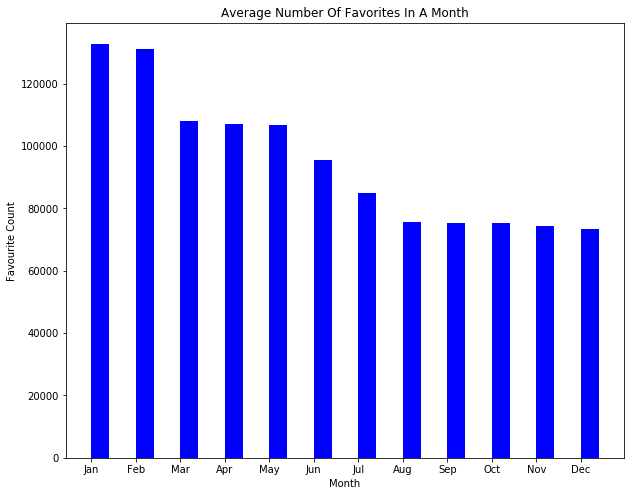

In [174]:
plt.figure(figsize = (10, 8))
favorite_bars = plt.bar(index+width, favourite_data, width, alpha = 1, color = 'b', label = 'number_of_favorites')

# title and labels
plt.title('Average Number Of Favorites In A Month')
plt.xlabel('Month')
plt.ylabel('Favourite Count')
locations = index + (width/2)
x_axis_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(locations, x_axis_labels)

#### Observations & Insights:

- As we can see that on an average, number of favorites are quite higher in January.
- February has the second highest both average number of favorites and retweets.
- December has the least number of favourites which is in close range with september, october & november.

### Comparison Of Average Rating Of Dog Stages

In [155]:
# Create a subset of the tweet_data_clean with the required variables
rating_dog = archive_clean[['tweet_id', 'rating_numerator', 'rating_denominator', 'dog_stage']].copy()

In [156]:
# Create a variable and store dog_stage value counts
dog_count = rating_dog.groupby('dog_stage').dog_stage.count()
dog_count = dog_count.drop('',axis=0)
dog_count

dog_stage
doggo        83
floofer       9
multiple     14
pupper      244
puppo        29
Name: dog_stage, dtype: int64

In [157]:
# Create a variable and store the average rating numerator for each dog stage
avg_rating = rating_dog.groupby('dog_stage').rating_numerator.mean()
avg_rating = avg_rating.drop('',axis=0)

In [158]:
avg_rating.index.values

array(['doggo', 'floofer', 'multiple', 'pupper', 'puppo'], dtype=object)

In [159]:
# Create a function for calculating percentages and labelling different sections of a pie chart
def func(pct, dog_count):
    absolute = int(pct/100.*np.sum(dog_count))
    return "{:.2f}%\n({:d})".format(pct, absolute)

Text(0,0.5,'Ratings')

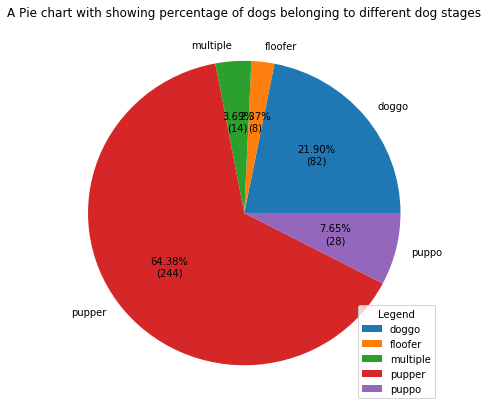

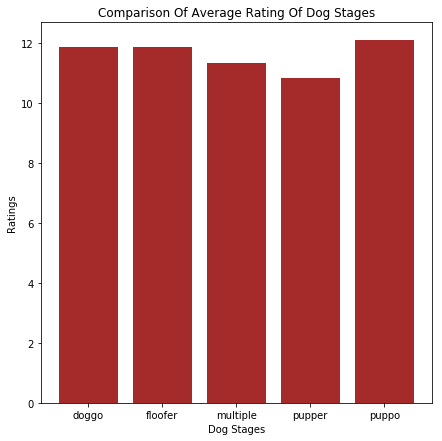

In [172]:
# Plot a pie chart with legend for showing percentage of dogs belonging to different dog stages
plt.figure(figsize = (7, 7))
plt.pie(dog_count, labels = avg_rating.index.values, autopct = lambda pct: func(pct, dog_count))
plt.legend(title = "Legend", loc = 4)
plt.title("A Pie chart with showing percentage of dogs belonging to different dog stages")
# Plot a bar chart with title, xlabel and ylabel for comparison of average rating Of dog stages
plt.figure(figsize = (7, 7))
plt.bar(avg_rating.index.values, avg_rating, 0.8, color = 'brown', alpha = 1)
plt.title('Comparison Of Average Rating Of Dog Stages')
plt.xlabel('Dog Stages')
plt.ylabel('Ratings')

#### Observations & Insights:

- From the bar graph, it can be clearly seen that puppo has the highest average rating while pupper has the lowest.
- From the pie chart, we can see that there are 63.48% of puppers in the overall population of the dataset followed by doggo, then floofer and at the last, puppo. This indicates the possible reason of lowest average rating of pupper and highest average rating of doggo because of huge differences in their proportion in the dataset

### Algorithm's First Prediction Efficiency for top 10 most frequent predictions

In [161]:
# Create a subset of the img_pred_clean with the required variables
pred_eff = predictions_clean[['tweet_id', 'first_prediction', 'first_prediction_confidence', 'first_prediction_dog']].copy()

In [162]:
# See the first five rows of the subset
pred_eff.head()

,tweet_id,first_prediction,first_prediction_confidence,first_prediction_dog
0,666020888022790149,Welsh springer spaniel,0.465074,True
1,666029285002620928,Redbone,0.506826,True
2,666033412701032449,German shepherd,0.596461,True
3,666044226329800704,Rhodesian ridgeback,0.408143,True
4,666049248165822465,Miniature pinscher,0.560311,True


In [163]:
# Store the value counts of 10 most frequent predictions in a seperate variable
total_predictions = pred_eff.first_prediction.value_counts().head(10).values
total_predictions

array([139,  95,  88,  79,  55,  41,  40,  38,  38,  29])

In [164]:
# Store the prediction names of 10 most frequent predictions in a seperate variable
prediction_names = pred_eff.first_prediction.value_counts().head(10).index.values
prediction_names

array(['Golden retriever', 'Labrador retriever', 'Pembroke', 'Chihuahua',
       'Pug', 'Chow', 'Samoyed', 'Toy poodle', 'Pomeranian', 'Malamute'], dtype=object)

In [165]:
# Store the instances when algorithm's first prediction has been successful in a list
true_counts = []
for item in prediction_names:
    x = pred_eff[(pred_eff.first_prediction == item) & (pred_eff.first_prediction_confidence > 0.5) & (pred_eff.first_prediction_dog == True)]['first_prediction_confidence'].count()
    true_counts.append(x)
true_counts

[116, 65, 70, 47, 44, 26, 30, 24, 29, 18]

In [166]:
# Create a dataframe for the above 3 new variables
eff_dict = {'prediction_name': prediction_names, 'prediction_total':total_predictions, 'prediction_correct':true_counts}
eff_result = pd.DataFrame(eff_dict, columns=['prediction_name', 'prediction_total', 'prediction_correct'])
eff_result

,prediction_name,prediction_total,prediction_correct
0,Golden retriever,139,116
1,Labrador retriever,95,65
2,Pembroke,88,70
3,Chihuahua,79,47
4,Pug,55,44
5,Chow,41,26
6,Samoyed,40,30
7,Toy poodle,38,24
8,Pomeranian,38,29
9,Malamute,29,18


In [167]:
# Calculate the prediction efficiency in a seperate column
eff_result['prediction_efficiency(in %)'] = (eff_result['prediction_correct'] / eff_result['prediction_total'])*100
eff_result

,prediction_name,prediction_total,prediction_correct,prediction_efficiency(in %)
0,Golden retriever,139,116,83.453237
1,Labrador retriever,95,65,68.421053
2,Pembroke,88,70,79.545455
3,Chihuahua,79,47,59.493671
4,Pug,55,44,80.000000
5,Chow,41,26,63.414634
6,Samoyed,40,30,75.000000
7,Toy poodle,38,24,63.157895
8,Pomeranian,38,29,76.315789
9,Malamute,29,18,62.068966


#### Observations & Insights:

- In the above table we can clearly see that the algorithm has proved to be most efficient for Golden Retrievers.
- Algorithm has proved to be least efficient for Chihuahuas.
- The most predictions are recorded for Golden Retrievers and least for Malamutes
- Therefore, we can say that, this algorithm favors the Golden Retrievers in this dataset